<a href="https://colab.research.google.com/github/Deepayanbasu07/SAR-Target-Classification-Using-Deep-Learning/blob/main/SAR_Target_Classification_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/SAR Target Classification/MSTAR_TargetImages'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
ds = image_dataset_from_directory(
    dataset_path,
    image_size=(256, 256),  # Adjust based on your image dimensions
    batch_size=32,          # Adjust the batch size as needed
    label_mode='categorical',
    shuffle=True,
    seed=42,
    validation_split=0.2,   # Optional split
    subset='training'       # Specify 'training' for training data
)

Found 8689 files belonging to 8 classes.
Using 6952 files for training.


In [ ]:
val_ds = image_dataset_from_directory(
    dataset_path,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'     # Specify 'validation' for validation data
)

Found 8689 files belonging to 8 classes.
Using 1737 files for validation.


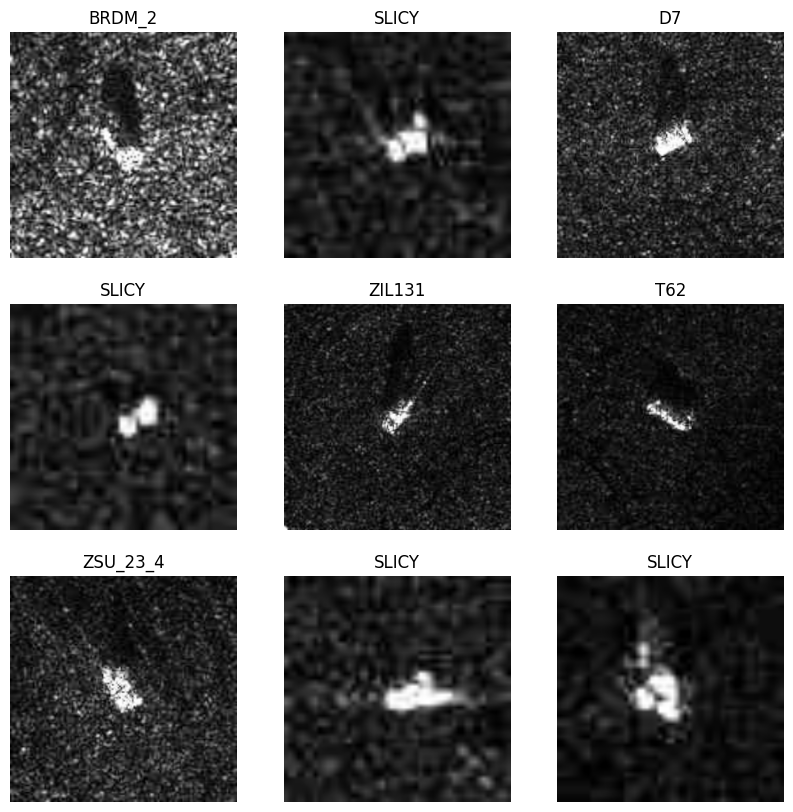

In [ ]:
import matplotlib.pyplot as plt

class_names = ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalized pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,625,672 (196.94 MB)

 Trainable params: 51,625,672 (196.94 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    ds,
    validation_data=val_ds,
    epochs=10  # Adjust based on your needs
)

Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1841s 8s/step - accuracy: 0.5329 - loss: 1.4160 - val_accuracy: 0.9148 - val_loss: 0.2062
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1500s 7s/step - accuracy: 0.9179 - loss: 0.2213 - val_accuracy: 0.9511 - val_loss: 0.1241
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1527s 7s/step - accuracy: 0.9507 - loss: 0.1245 - val_accuracy: 0.9413 - val_loss: 0.1308
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1539s 7s/step - accuracy: 0.9513 - loss: 0.1064 - val_accuracy: 0.9505 - val_loss: 0.0985
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1539s 7s/step - accuracy: 0.9654 - loss: 0.0760 - val_accuracy: 0.9396 - val_loss: 0.1316
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1483s 7s/step - accuracy: 0.9596 - loss: 0.0807 - val_accuracy: 0.9562 - val_loss: 0.1213
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1520s 7s/step - accuracy: 0.9642 - loss: 0.0693 - val_accuracy: 0.9413 - val_loss: 0.1137
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1575s 7s/step - accuracy: 0.9584 - loss: 0.0908 - 

In [33]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9403 - loss: 0.1404
Validation Loss: 0.13012923300266266
Validation Accuracy: 0.9412780404090881


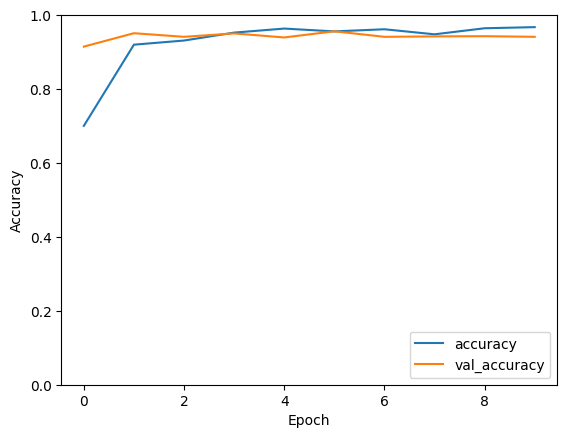

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()